In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [4]:
!wget http://www.kasprowski.pl/datasets/weather.zip

--2023-11-17 08:17:58--  http://www.kasprowski.pl/datasets/weather.zip
Resolving www.kasprowski.pl (www.kasprowski.pl)... 94.152.164.213
Connecting to www.kasprowski.pl (www.kasprowski.pl)|94.152.164.213|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95380686 (91M) [application/zip]
Saving to: ‘weather.zip’

weather.zip         100%[===================>]  90.96M  11.7MB/s    in 8.5s    

2023-11-17 08:18:07 (10.7 MB/s) - ‘weather.zip’ saved [95380686/95380686]



In [78]:
!unzip weather.zip
print("Unzipped")

Archive:  weather.zip
replace weather/cloudy/cloudy1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Unzipped


Prepare datasets for Task1 and Task2

In [2]:
import cv2
import os
def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
        if not os.path.isdir(indir+'/'+class_dir):
          continue
        print("Loading:",class_dir)
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (64,64))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels

def load_img_task1(indir):
    samples = []
    labels = []
    dirs = ['sunrise','cloudy'] # pick only this classes
    for class_dir in dirs:
        #if class_dir == "cloudy" or class_dir == "sunrise":
        if not os.path.isdir(indir+'/'+class_dir):
          continue
        print("Loading:",class_dir)
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (64,64))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels

samples_task1, labels_task1 = load_img_task1("weather")
samples, labels = load_img('weather')
print('loaded_task1',len(samples_task1),' samples')
print('classes_task1',set(labels_task1))
print('loaded',len(samples),' samples')
print('classes',set(labels))
org_samples_task1 = samples_task1
org_labels_task1 = labels_task1
org_samples = samples
org_labels = labels

Loading: sunrise
Loading: cloudy
Loading: sunrise
Loading: shine
Loading: rain
Loading: cloudy
loaded_task1 657  samples
classes_task1 {'cloudy', 'sunrise'}
loaded 1123  samples
classes {'shine', 'cloudy', 'sunrise', 'rain'}


Check data

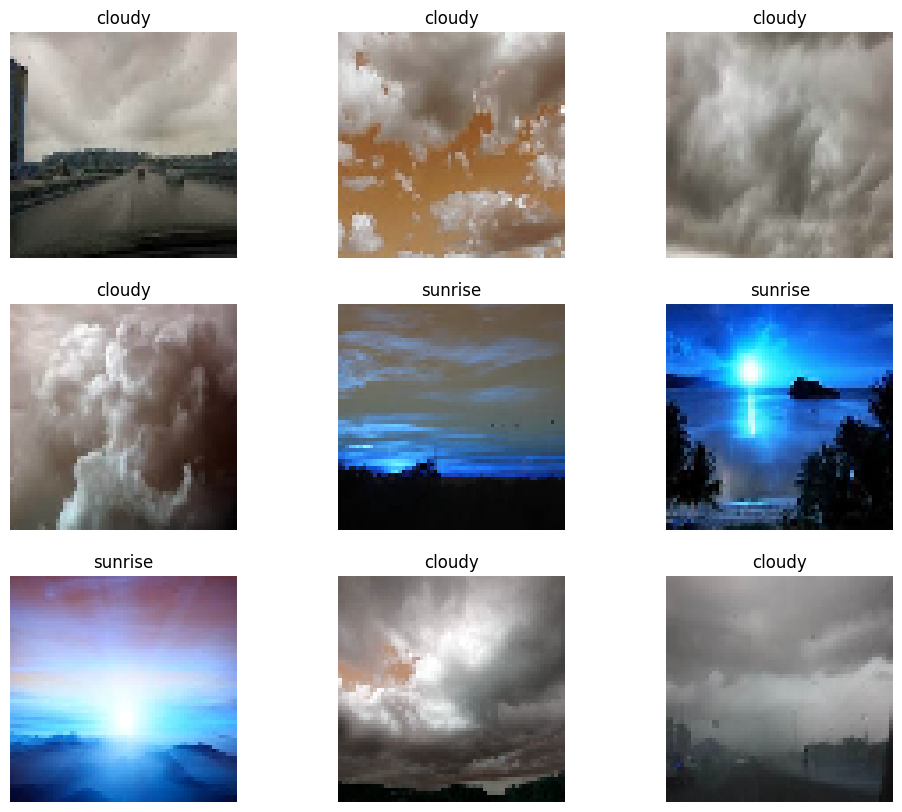

In [3]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(samples_task1))
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples_task1[n])
    plt.title(labels_task1[n])
    plt.axis("off")

First model for Clody and Sunrise binary_crossentropy

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

model_task1 = Sequential()

model_task1.add(Conv2D(32, (3, 3), padding="same", input_shape=(64, 64, 3)))
model_task1.add(BatchNormalization())
model_task1.add(Activation("relu"))
model_task1.add(MaxPooling2D(pool_size=(2, 2)))

model_task1.add(Conv2D(64, (3, 3), padding="same"))
model_task1.add(BatchNormalization())
model_task1.add(Activation("relu"))
model_task1.add(MaxPooling2D(pool_size=(2, 2)))


model_task1.add(Dropout(0.25))

model_task1.add(Flatten())

model_task1.add(Dense(512))
model_task1.add(Activation("relu"))

model_task1.add(Dense(1, activation='sigmoid'))

model_task1.summary()

optimizer_task1 = tf.keras.optimizers.RMSprop(0.0001)
model_task1.compile(loss='binary_crossentropy', optimizer=optimizer_task1, metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 64)       

Second model for Cloudy and Sunrise categorical_crossentropy

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

model_task11 = Sequential()

model_task11.add(Conv2D(32, (3, 3), padding="same", input_shape=(64, 64, 3)))
model_task11.add(BatchNormalization())
model_task11.add(Activation("relu"))
model_task11.add(MaxPooling2D(pool_size=(2, 2)))

model_task11.add(Conv2D(64, (3, 3), padding="same"))
model_task11.add(BatchNormalization())
model_task11.add(Activation("relu"))
model_task11.add(MaxPooling2D(pool_size=(2, 2)))

model_task11.add(Dropout(0.25))
model_task11.add(Flatten())
model_task11.add(Dense(512))
model_task11.add(Activation("relu"))

model_task11.add(Dense(2, activation='sigmoid'))
model_task11.summary()

optimizer_task11 = tf.keras.optimizers.RMSprop(0.0001)
model_task11.compile(loss='categorical_crossentropy', optimizer=optimizer_task11, metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_8 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 64)       

Third model for all 4 classes categorical_crossentropy

In [30]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(4))
model.add(Activation("softmax"))

model.summary()
optimizer = tf.keras.optimizers.RMSprop(0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_10 (Ba  (None, 64, 64, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_16 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_11 (Ba  (None, 32, 32, 64)       

In [7]:
samples_task1 = org_samples_task1.copy()
labels_task1 = org_labels_task1.copy()
samples = org_samples.copy()
labels = org_labels.copy()
print("Samples shape before",samples_task1.shape)

# flatten samples
# samples_task1 = np.reshape(samples_task1, newshape=(657, -1))
print("Samples shape flattened",samples_task1.shape)

print("Samples shape before",samples.shape)

# flatten samples
#samples = np.reshape(samples, newshape=(1123, -1))
print("Samples shape flattened",samples.shape)

Samples shape before (657, 64, 64, 3)
Samples shape flattened (657, 64, 64, 3)
Samples shape before (1123, 64, 64, 3)
Samples shape flattened (1123, 64, 64, 3)


Prepare data for training network

In [8]:
from sklearn.preprocessing import LabelBinarizer
lb_task1 = LabelBinarizer()
labels_task1 = lb_task1.fit_transform(labels_task1)
print("Labels shape",labels_task1.shape)
labels_task1 = labels_task1.astype(float)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(labels_task1).toarray().astype(float)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print("Labels shape",labels.shape)
labels = labels.astype(float)
print("hotend",one_hot_encoded.shape)

Labels shape (657, 1)
Labels shape (1123, 4)
hotend (657, 2)


In [11]:
one_hot_encoded

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Split data to training and test datasets

In [9]:
samples_task1 = org_samples_task1
print(samples_task1.shape)
import sklearn.model_selection
(trainSamples_task1, testSamples_task1, trainLabels_task1, testLabels_task1) = sklearn.model_selection.train_test_split(samples_task1,labels_task1,random_state=22,test_size=0.25)

samples_task1 = org_samples_task1
print(samples_task1.shape)
import sklearn.model_selection
(trainSamples_task11, testSamples_task11, trainLabels_task11, testLabels_task11) = sklearn.model_selection.train_test_split(samples_task1,one_hot_encoded,random_state=22,test_size=0.25)


samples = org_samples
print(samples.shape)
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,random_state=22,test_size=0.25)

(657, 64, 64, 3)
(657, 64, 64, 3)
(1123, 64, 64, 3)


In [84]:
print(trainLabels.shape, trainLabels_task1.shape)

(842, 4) (492, 1)


Train models 10 epoch

In [31]:
model_task1.fit(trainSamples_task1, trainLabels_task1, epochs=10, validation_data=(testSamples_task1,testLabels_task1))

Epoch 1/10
16/16 [==============================] - 9s 498ms/step - loss: 0.9122 - accuracy: 0.8415 - val_loss: 4.3711 - val_accuracy: 0.6485
Epoch 2/10
16/16 [==============================] - 6s 392ms/step - loss: 0.1949 - accuracy: 0.9533 - val_loss: 0.1010 - val_accuracy: 0.9697
Epoch 3/10
16/16 [==============================] - 8s 523ms/step - loss: 0.0540 - accuracy: 0.9695 - val_loss: 0.2617 - val_accuracy: 0.9091
Epoch 4/10
16/16 [==============================] - 6s 381ms/step - loss: 0.0762 - accuracy: 0.9776 - val_loss: 0.1446 - val_accuracy: 0.9515
Epoch 5/10
16/16 [==============================] - 8s 529ms/step - loss: 0.0228 - accuracy: 0.9898 - val_loss: 0.0774 - val_accuracy: 0.9758
Epoch 6/10
16/16 [==============================] - 6s 394ms/step - loss: 0.0455 - accuracy: 0.9837 - val_loss: 0.2085 - val_accuracy: 0.9697
Epoch 7/10
16/16 [==============================] - 9s 552ms/step - loss: 0.0181 - accuracy: 0.9980 - val_loss: 0.1112 - val_accuracy: 0.9818
Epoch 

In [32]:
model_task11.fit(trainSamples_task11, trainLabels_task11, epochs=10, validation_data=(testSamples_task11,testLabels_task11))

Epoch 1/10
16/16 [==============================] - 9s 469ms/step - loss: 0.8881 - accuracy: 0.8435 - val_loss: 0.3929 - val_accuracy: 0.9455
Epoch 2/10
16/16 [==============================] - 7s 443ms/step - loss: 0.1967 - accuracy: 0.9492 - val_loss: 0.2241 - val_accuracy: 0.9212
Epoch 3/10
16/16 [==============================] - 8s 461ms/step - loss: 0.1317 - accuracy: 0.9614 - val_loss: 0.0920 - val_accuracy: 0.9758
Epoch 4/10
16/16 [==============================] - 7s 460ms/step - loss: 0.0335 - accuracy: 0.9919 - val_loss: 0.0889 - val_accuracy: 0.9758
Epoch 5/10
16/16 [==============================] - 7s 434ms/step - loss: 0.0229 - accuracy: 0.9898 - val_loss: 0.0941 - val_accuracy: 0.9758
Epoch 6/10
16/16 [==============================] - 6s 377ms/step - loss: 0.0930 - accuracy: 0.9634 - val_loss: 0.0682 - val_accuracy: 0.9697
Epoch 7/10
16/16 [==============================] - 8s 519ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9818
Epoch 

In [33]:
model.fit(trainSamples, trainLabels, epochs=10, validation_data=(testSamples,testLabels))

Epoch 1/10
27/27 [==============================] - 14s 478ms/step - loss: 1.7612 - accuracy: 0.6900 - val_loss: 1.1805 - val_accuracy: 0.5943
Epoch 2/10
27/27 [==============================] - 11s 408ms/step - loss: 0.5001 - accuracy: 0.8242 - val_loss: 3.7378 - val_accuracy: 0.4448
Epoch 3/10
27/27 [==============================] - 12s 423ms/step - loss: 0.4194 - accuracy: 0.8527 - val_loss: 0.9986 - val_accuracy: 0.6762
Epoch 4/10
27/27 [==============================] - 14s 529ms/step - loss: 0.3200 - accuracy: 0.8979 - val_loss: 0.6072 - val_accuracy: 0.7260
Epoch 5/10
27/27 [==============================] - 12s 460ms/step - loss: 0.2366 - accuracy: 0.9181 - val_loss: 0.6930 - val_accuracy: 0.7651
Epoch 6/10
27/27 [==============================] - 12s 460ms/step - loss: 0.1914 - accuracy: 0.9382 - val_loss: 0.2799 - val_accuracy: 0.9146
Epoch 7/10
27/27 [==============================] - 11s 427ms/step - loss: 0.1465 - accuracy: 0.9525 - val_loss: 0.2862 - val_accuracy: 0.9039

Test results of trained models

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults_task1 = model_task1.predict(testSamples_task1)

print(confusion_matrix(testLabels_task1.argmax(axis=1), testResults_task1.argmax(axis=1)))
print(classification_report(testLabels_task1.argmax(axis=1), testResults_task1.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels_task1.argmax(axis=1), testResults_task1.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabels_task1.argmax(axis=1), testResults_task1.argmax(axis=1)))

6/6 [==============================] - 1s 111ms/step
[[165]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

Cohen's Kappa: nan
Accuracy:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:673: RuntimeWarning: invalid value encountered in double_scalars
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults_task11 = model_task11.predict(testSamples_task1)

print(confusion_matrix(testLabels_task11.argmax(axis=1), testResults_task11.argmax(axis=1)))
print(classification_report(testLabels_task11.argmax(axis=1), testResults_task11.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels_task11.argmax(axis=1), testResults_task11.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabels_task11.argmax(axis=1), testResults_task11.argmax(axis=1)))

6/6 [==============================] - 1s 71ms/step
[[72  0]
 [ 3 90]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.97      0.98        93

    accuracy                           0.98       165
   macro avg       0.98      0.98      0.98       165
weighted avg       0.98      0.98      0.98       165

Cohen's Kappa: 0.9632107023411371
Accuracy:  0.9818181818181818


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults = model.predict(testSamples)

print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1)))

9/9 [==============================] - 1s 76ms/step
[[74  3  6  0]
 [ 3 42  1  0]
 [ 2  0 52  4]
 [ 0  0  1 93]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        83
           1       0.93      0.91      0.92        46
           2       0.87      0.90      0.88        58
           3       0.96      0.99      0.97        94

    accuracy                           0.93       281
   macro avg       0.92      0.92      0.92       281
weighted avg       0.93      0.93      0.93       281

Cohen's Kappa: 0.9026603852016073
Accuracy:  0.9288256227758007


Represent results

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


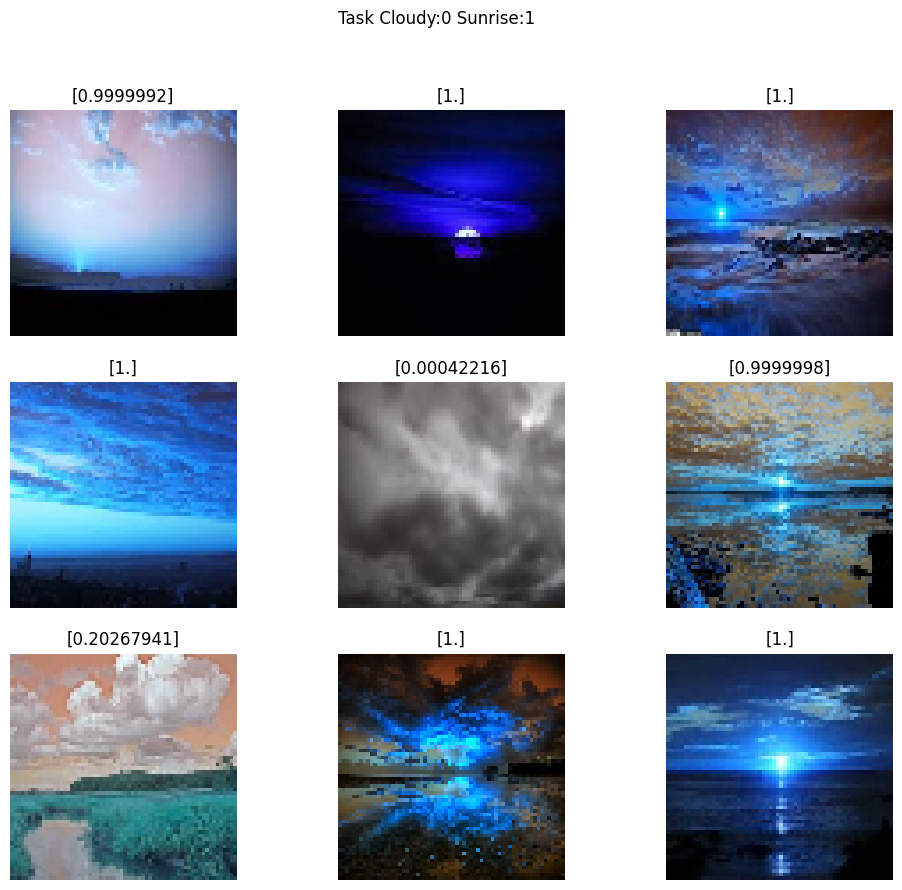

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(org_labels_task1)

# Now, you can use transformed_labels in your plot
plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(testSamples_task1))
    plt.subplot(3, 3, i + 1)
    plt.imshow(testSamples_task1[n])
    plt.title( testResults_task1[n] > 0.5 org_labels_task1[0] : org_labels_task1[1]
        # le.inverse_transform(
        #   [np.argmax((testResults_task1[n]))]
        # )
    )
    plt.axis("off")
plt.suptitle("Task Cloudy:0 Sunrise:1")
plt.show()

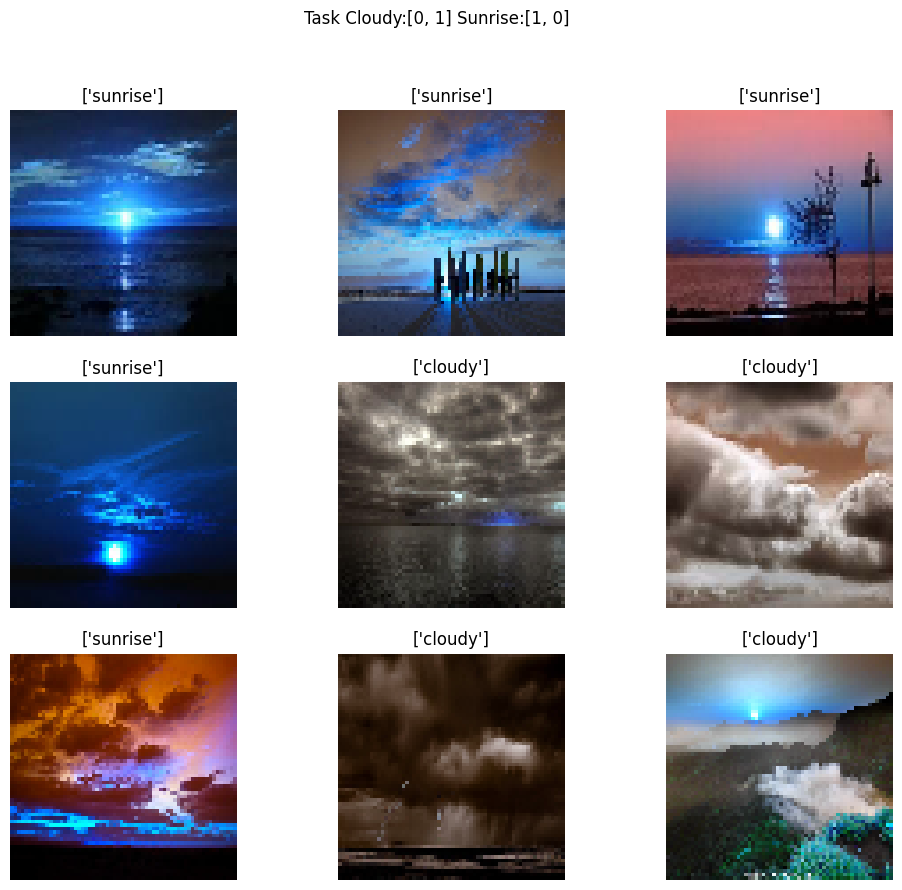

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(org_labels_task1)

# Now, you can use transformed_labels in your plot
plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(testSamples_task11))
    plt.subplot(3, 3, i + 1)
    plt.imshow(testSamples_task11[n])
    plt.title(
        le.inverse_transform(
          [np.argmax((testResults_task11[n]))]
        )
    )
    plt.axis("off")
plt.suptitle("Task Cloudy:[0, 1] Sunrise:[1, 0]")
plt.show()

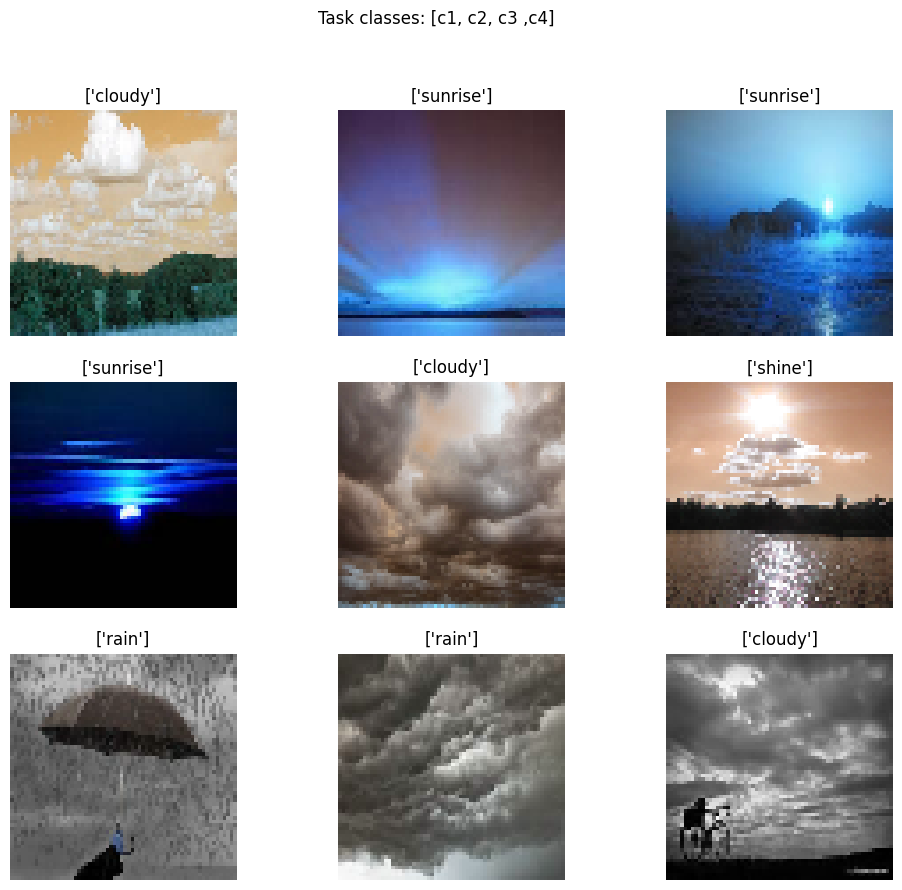

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(org_labels)

# Now, you can use transformed_labels in your plot
plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(testSamples))
    plt.subplot(3, 3, i + 1)
    plt.imshow(testSamples[n])
    plt.title(
        le.inverse_transform(
          [np.argmax((testResults[n]))]
        )
    )
    plt.axis("off")
plt.suptitle("Task classes: [c1, c2, c3 ,c4]")
plt.show()